Importation des biblotheques

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import glob
import os
import random

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

2023-06-17 13:13:17.492610: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 13:13:17.640504: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 13:13:17.641722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 13:13:20.290890: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Importation d'une image

In [52]:
img=Image.open("me.jpg").resize((64, 64)).convert('L')

(-0.5, 63.5, 63.5, -0.5)

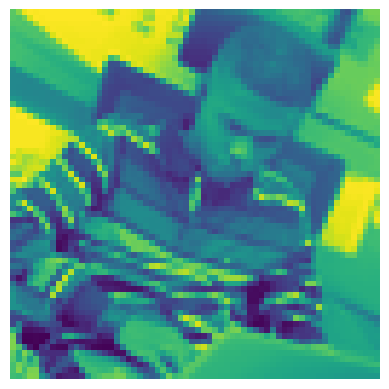

In [53]:
plt.imshow(img)
plt.axis(False)

In [54]:
img=np.array(img)

In [55]:
img.shape

(64, 64)

Importation des images

In [7]:
targets=[]
images=[]
#Lister les images du data set
files = glob.glob("data_set/*.jpg")
#Mettre les images dans le desordre
random.shuffle(files)
#Creer un tableau d'image avec leur label 
for file in files:
    image=np.array(Image.open(file).resize((64, 64)).convert('L'))
    images.append(image)
    #Encodage en one hot des images
    if 'cat' in file:
        target=0 
    elif 'dog' in file :
        target=1 
    else :
        target=2
    targets.append(target)
    
images=np.array(images)
targets=np.array(targets)

In [58]:
files[:7]

['data_set/cat.3074.jpg',
 'data_set/airplane0073.jpg',
 'data_set/car_650.jpg',
 'data_set/dog.4778.jpg',
 'data_set/cat.2385.jpg',
 'data_set/cat.1677.jpg',
 'data_set/dog.2723.jpg']

In [8]:
images=images.reshape(images.shape[0],images.shape[1],images.shape[2],1)

In [9]:
print(images.shape)
print(targets.shape)

(13812, 64, 64, 1)
(13812,)


Visualisation des images

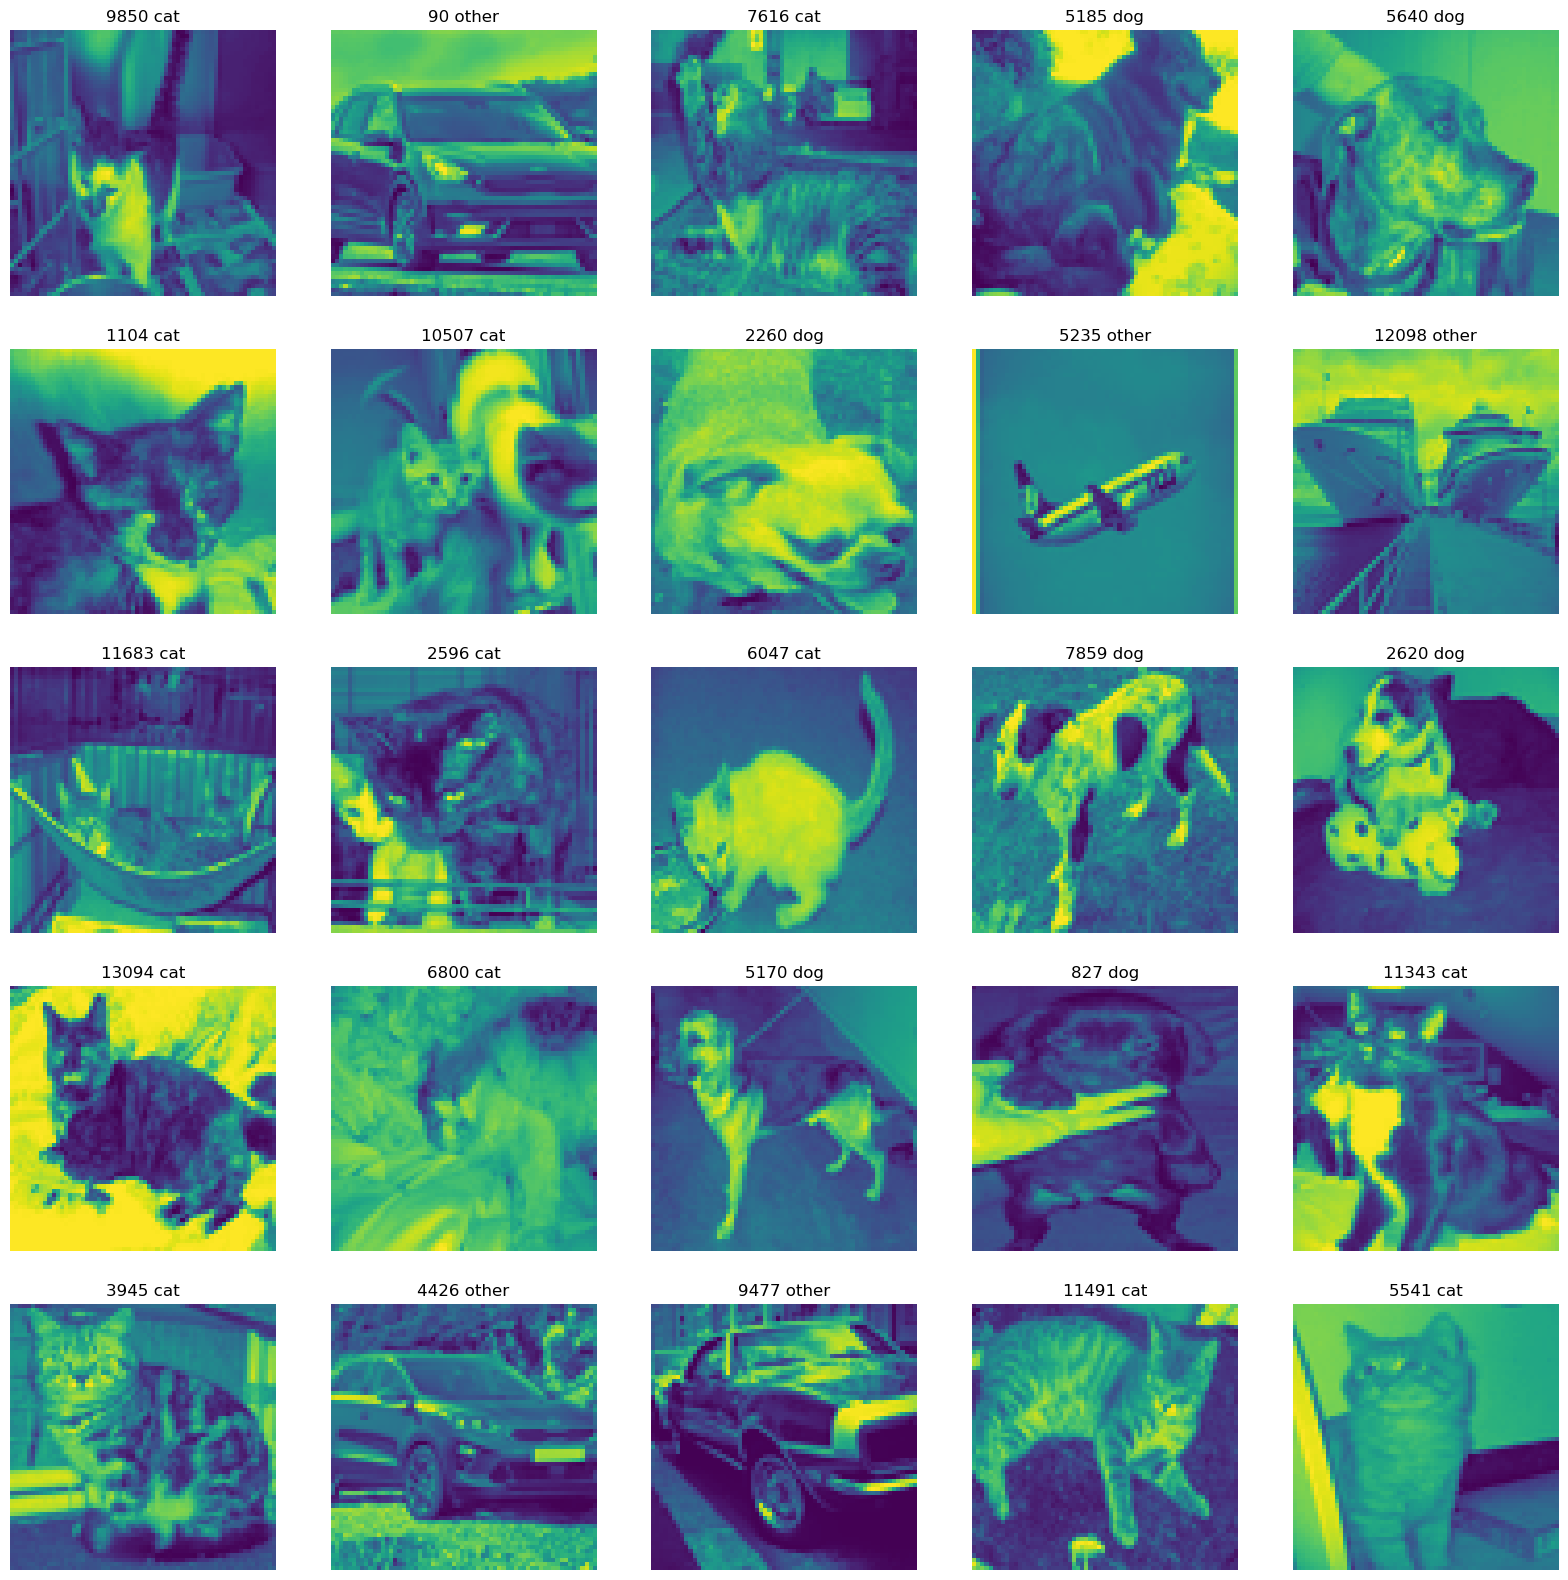

In [10]:
from random import randint
plt.figure(figsize=(20,20))
for j in range(25):
    i=randint(0,images.shape[0])
    plt.subplot(5,5,j+1)
    plt.imshow(images[i])
    if targets[i]==0:
        label= str(i+1)+" "+"cat"
    elif targets[i]==1 :
        label=str(i+1)+" "+"dog"
    else :
        label=str(i+1)+" "+"other"
    plt.axis(False)
    plt.title(label)
plt.savefig("Viz_Img.png")
plt.show()

Separation Train set /Test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_images,test_images, train_labels, test_labels=train_test_split(images, targets, test_size=0.1, random_state=42)

In [13]:
print("train images :",train_images.shape)
print("train labels :",train_labels.shape)
print("test images :",test_images.shape)
print("test labels :",test_labels.shape)

train images : (12430, 64, 64, 1)
train labels : (12430,)
test images : (1382, 64, 64, 1)
test labels : (1382,)


Creation du modèle

In [14]:
#Normalisation des donnees

train_images, test_images = train_images / 255.0, test_images / 255.0

In [63]:
#Creation du modèle
model = models.Sequential()

#Formatage des inputs du modèles
model.add(layers.Input(shape=(64,64,1),name="Images"))

#Couches de convolution
nb_label=train_labels.max()+1
print(nb_label)
#Première couche de convolution de 32 neurones de kernel 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))#DropOut de 20% : 20% des neurones de la couche seront désactivés
#Deuxième couche de convolution de 16 neurones de kernel 3x3
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))#DropOut de 20% : 20% des neurones de la couche seront désactivés
#Troisière couche de convolution de 8 neurones de kernel 3x3
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))#DropOut de 20% : 20% des neurones de la couche seront désactivés

#Couche de flatten
model.add(layers.Flatten())

#Couches entièrements connectés
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))#DropOut de 50% : 50% des neurones de la couche seront désactivés
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))#DropOut de 50% : 50% des neurones de la couche seront désactivés
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))#DropOut de 50% : 50% des neurones de la couche seront désactivés
model.add(layers.Dense(nb_label, activation='softmax'))

3


Compilation du modèle

In [32]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 16)       

Entrainement du modèle

In [36]:
#history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

In [29]:
#Visualisation de l'apprentissage
import datetime

loss_curve=history.history["loss"]
acc_curve=history.history["accuracy"]

loss_val_curve=history.history["val_loss"]
acc_val_curve=history.history["val_accuracy"]

plt.figure()
plt.plot(loss_curve, label="Train_loss")
plt.plot(loss_val_curve, label="Val_loss")
plt.legend(loc="upper left")
plt.title("loss")
plt.savefig(f"models/loss_fig_{str(datetime.datetime.now())}.png")
plt.close()

plt.figure()
plt.plot(acc_curve, label="Train_acc")
plt.plot(acc_val_curve, label="Val_acc")
plt.legend(loc="upper left")
plt.title("accuracy")
plt.savefig(f"models/acc_fig_{str(datetime.datetime.now())}.png")
plt.close()

#Sauvegarde du modèle

model.save(f'models/cnn_avec_bibiotheque_{str(datetime.datetime.now())}.h5')

Prediction

(64, 64)
1/1 [==============================] - 0s 174ms/step
Cette image est un(e) :  other 100.0%


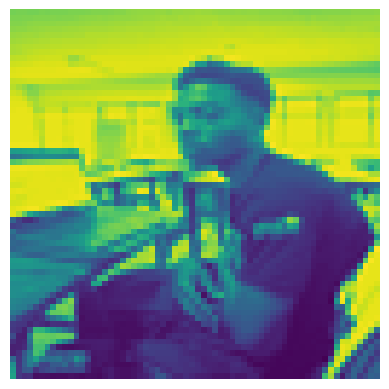

In [5]:

loaded_model=tf.keras.models.load_model('models/cnn_avec_bibiotheque_2023-06-17 02:32:52.473255.h5')

img_path = "IMG_20230617_121802_403.jpg"
img=Image.open(img_path).resize((64, 64)).convert('L')
plt.imshow(img)
plt.axis(False)
img_arr = np.array(img)/255.0
print(img_arr.shape)
img_arr = img_arr.reshape(1, 64, 64, 1)
predictions = loaded_model.predict(img_arr)
class_names =["cat", "dog", "other"]
print("Cette image est un(e) : ", class_names[np.argmax(predictions)],f"{round(100*predictions.max(),2)}%")

(64, 64)
1/1 [==============================] - 0s 184ms/step
Cette image est un(e) :  dog 63.07%


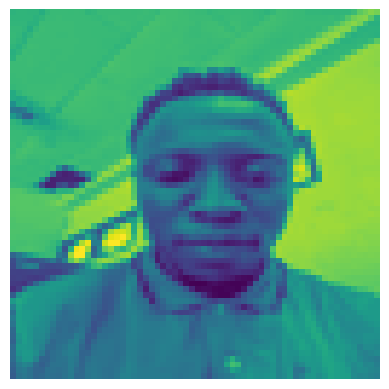

In [6]:

loaded_model=tf.keras.models.load_model('models/cnn_avec_bibiotheque_2023-06-17 02:32:52.473255.h5')

img_path = "me1.jpg"
img=Image.open(img_path).resize((64, 64)).convert('L')
plt.imshow(img)
plt.axis(False)
img_arr = np.array(img)/255.0
print(img_arr.shape)
img_arr = img_arr.reshape(1, 64, 64, 1)
predictions = loaded_model.predict(img_arr)
class_names =["cat", "dog", "other"]
print("Cette image est un(e) : ", class_names[np.argmax(predictions)],f"{round(100*predictions.max(),2)}%")